## Problem Statement
The dataset contains raw hospital patient data with inconsistencies such as spelling errors, missing values, and duplicates. The goal is to clean and analyze this data to uncover insights into patient demographics, disease patterns, payment methods, and hospital stay durations, while addressing data quality issues that could affect accurate analysis and predictive modeling.

In [2]:
# ! pip install sqlalchemy

In [ ]:
import pandas as pd # import pandas library 


In [5]:
df= pd.read_csv("hospital_dataset.csv") # Load the dataset

In [6]:
df.head(20) #Use for a data understanding

,Patient_ID,Name,Age,Gender,Blood_Type,Disease,Admission_Date,Discharge_Date,Days_Admitted,Doctor,Hospital_Department,Bill_Amount,Payment_Method,City,Follow_Up_Required
0,P1480,Patient_480,12.0,Feale,O+,Covid-19,2024-01-10,2024-01-11,1,Dr. Iyer,Neurology,36542.0,Cash,Delhi,Yes
1,P1449,Patient_449,54.0,Mlae,B+,Covid-19,2024-03-18,2024-03-21,3,Dr. Mehta,Orthopedics,188356.0,Cash,Bengaluru,No
2,P1475,Patient_475,NaN,Feale,AB-,Cardiac Arrest,2024-07-13,2024-07-22,9,Dr. Sharma,General Medicine,267888.0,Insurance,Delhi,Yes
3,P1434,Patient_434,86.0,Other,A+,Asthma,2024-10-26,2024-10-27,1,Dr. Khan,Neurology,232893.0,Insurance,Chennai,Yes
4,P1368,Patient_368,6.0,Other,O-,Covid-19,2024-06-16,2024-06-13,6,Dr. Patel,General Medicine,42197.0,Cash,Chennai,No
5,P1055,Patient_55,90.0,Female,O-,Fracture,2024-08-01,2024-08-12,11,Dr. Iyer,General Medicine,394095.0,Insurence,Mumbai,No
6,P1322,Patient_322,41.0,Female,A-,Diabetes,2024-04-06,2024-04-02,8,Dr. Iyer,Orthopedics,93170.0,Credit Card,Pune,No
7,P1076,Patient_76,93.0,Feale,AB+,Cardiac Arrest,2024-06-19,2024-06-14,3,Dr. Khan,Neurology,316900.0,Cash,Nagpur,Yes
8,P1104,Patient_104,45.0,Mlae,A+,Fracture,2024-12-16,2024-12-19,3,Dr. Sharma,Cardiology,97665.0,Cash,Pune,No
9,P1347,Patient_347,98.0,Mlae,B+,Fever,2024-09-20,2024-09-24,4,Dr. Patel,Orthopedics,342146.0,Cash,Bengaluru,No


### Correct spelling mistakes.

In [7]:
print(df['Gender'].unique()) #checking unique value

['Feale' 'Mlae' 'Other' 'Female' 'Male']


In [8]:
# correct spelling mistakes.

df['Gender'] = df['Gender'].replace({'Feale': 'Female',
                                      'Mlae': 'Male'})  # Replace the incorrect values to correct value


In [9]:
print(df['Gender'].unique()) #Rechecking unique value

['Female' 'Male' 'Other']


In [10]:
df.shape # display the rows and column in the dataframe

(510, 15)

### Check null values and replace with mean.

In [11]:
df.isnull().sum()     # find out null values and sum of the null value.

Patient_ID              0
Name                    0
Age                    26
Gender                  0
Blood_Type              0
Disease                 0
Admission_Date          0
Discharge_Date          0
Days_Admitted           0
Doctor                  0
Hospital_Department     0
Bill_Amount             0
Payment_Method          0
City                    0
Follow_Up_Required      0
dtype: int64

In [12]:
mean=df['Age'].mean() #mean of Age.
print(mean)

50.349173553719005


In [13]:
# Handle Missing Values.

df['Age'].fillna(df['Age'].mean(), inplace=True)# fill and replace null value with mean.



# # 2nd Method
# df['Age'].fillna(mean)


df.isnull().sum()   # check again null values after handling missing values.


C:\Users\Admin\AppData\Local\Temp\ipykernel_2444\92303986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)# fill and replace null value with mean.


Patient_ID             0
Name                   0
Age                    0
Gender                 0
Blood_Type             0
Disease                0
Admission_Date         0
Discharge_Date         0
Days_Admitted          0
Doctor                 0
Hospital_Department    0
Bill_Amount            0
Payment_Method         0
City                   0
Follow_Up_Required     0
dtype: int64

### Find duplicates and remove them.

In [14]:
duplicates = df.duplicated()    # Find duplicate rows
print(duplicates.sum())  # Total duplicate rows





10


In [15]:

remove=df.drop_duplicates(inplace = True) # Remove duplicate rows
print(remove)

None


### Check the data types and non-null values.

In [16]:
df.info() # check the data types and non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 509
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           500 non-null    object 
 1   Name                 500 non-null    object 
 2   Age                  500 non-null    float64
 3   Gender               500 non-null    object 
 4   Blood_Type           500 non-null    object 
 5   Disease              500 non-null    object 
 6   Admission_Date       500 non-null    object 
 7   Discharge_Date       500 non-null    object 
 8   Days_Admitted        500 non-null    int64  
 9   Doctor               500 non-null    object 
 10  Hospital_Department  500 non-null    object 
 11  Bill_Amount          500 non-null    float64
 12  Payment_Method       500 non-null    object 
 13  City                 500 non-null    object 
 14  Follow_Up_Required   500 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory us

### Data understanding after cleaning.

In [17]:
df.head() #Use for a data understanding after cleaning the data

,Patient_ID,Name,Age,Gender,Blood_Type,Disease,Admission_Date,Discharge_Date,Days_Admitted,Doctor,Hospital_Department,Bill_Amount,Payment_Method,City,Follow_Up_Required
0,P1480,Patient_480,12.000000,Female,O+,Covid-19,2024-01-10,2024-01-11,1,Dr. Iyer,Neurology,36542.0,Cash,Delhi,Yes
1,P1449,Patient_449,54.000000,Male,B+,Covid-19,2024-03-18,2024-03-21,3,Dr. Mehta,Orthopedics,188356.0,Cash,Bengaluru,No
2,P1475,Patient_475,50.349174,Female,AB-,Cardiac Arrest,2024-07-13,2024-07-22,9,Dr. Sharma,General Medicine,267888.0,Insurance,Delhi,Yes
3,P1434,Patient_434,86.000000,Other,A+,Asthma,2024-10-26,2024-10-27,1,Dr. Khan,Neurology,232893.0,Insurance,Chennai,Yes
4,P1368,Patient_368,6.000000,Other,O-,Covid-19,2024-06-16,2024-06-13,6,Dr. Patel,General Medicine,42197.0,Cash,Chennai,No


In [18]:
df.describe() # Statistical summary of the data


,Age,Days_Admitted,Bill_Amount
count,500.000000,500.00000,5.000000e+02
mean,50.345459,6.75800,3.115266e+05
std,28.552430,4.38199,4.666540e+05
min,1.000000,0.00000,4.261000e+03
25%,26.000000,3.00000,1.372955e+05
50%,50.349174,7.00000,2.645150e+05
75%,72.000000,10.00000,3.899980e+05
max,99.000000,15.00000,4.966159e+06


### Quick Insights (Using df.describe):

- The average patient age is 50 years old.
- The minimum age is 1-year-old.
- The maximum age is 99 years old.
- The average hospital stay is 6 days.

### Checking follow up count 

In [19]:
follow=df['Follow_Up_Required'].value_counts() # Count the unique values in Follow_Up_Required column
print(follow)


Follow_Up_Required
Yes    266
No     234
Name: count, dtype: int64


The

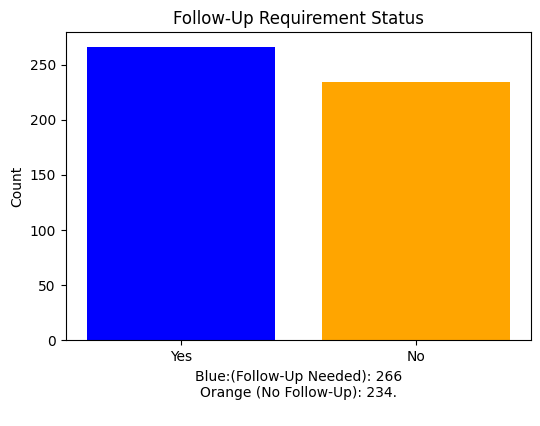

In [20]:
# Visualize the Follow_Up_Required column
import matplotlib.pyplot as plt # import matplotlib library
import seaborn as sns # import seaborn library
plt.figure(figsize=(6,4))
plt.bar(follow.index, follow.values, color=['blue', 'orange']) 
plt.title('Follow-Up Requirement Status')
plt.xlabel('Blue:(Follow-Up Needed): 266\nOrange (No Follow-Up): 234.\n')
plt.ylabel('Count')
plt.show()

### Summary: More than half of the Patient (53%) require a follow-up.

In [21]:
df['Disease'].value_counts() # Count unique values in Disease column


Disease
Fever             90
Cardiac Arrest    89
Asthma            88
Diabetes          82
Covid-19          76
Fracture          75
Name: count, dtype: int64

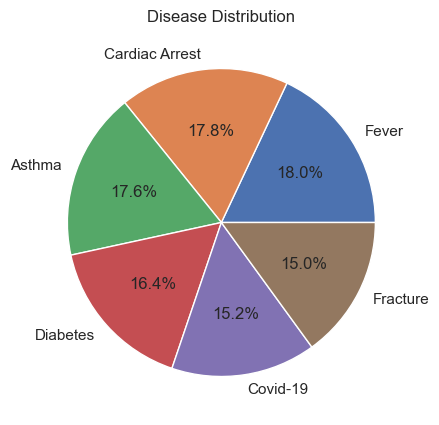

In [22]:
plt.figure(figsize=(12,5)) # Pie chart for Disease column
sns.set_theme(style="dark")
plt.pie(df['Disease'].value_counts(), labels=df['Disease'].value_counts().index, autopct='%1.1f%%') #atopct is used to show percentage
plt.title('Disease Distribution')
plt.show()

### Disease Distribution Pie Chart: Displays the proportion of diseases, with Cardiac Arrest at the top.

In [23]:
df['Payment_Method'].value_counts()

Payment_Method
Cash           204
Insurence      106
Insurance      102
Credit Card     88
Name: count, dtype: int64

In [24]:
# Correct spelling in Payment_Method column to merge 'Insurence' and 'Insurance'
df['Payment_Method'] = df['Payment_Method'].replace({'Insurence': 'Insurance'})

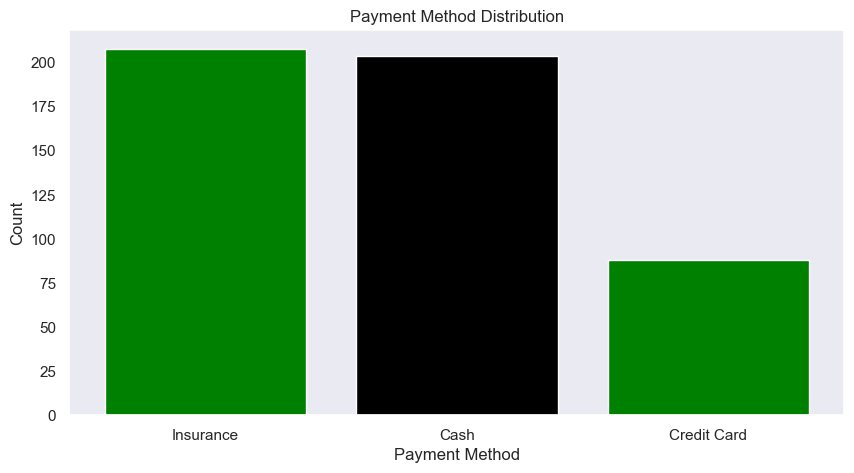

In [25]:

plt.figure(figsize=(10,5)) # Bar chart for Payment_Method column
sns.set_theme(style="dark") 
plt.bar(df['Payment_Method'].value_counts().index, df['Payment_Method'].value_counts().values, color=["green","black"])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### Payment Method Bar Chart: After correcting 'Insurence' to 'Insurance', shows Insurance as the most common method used by patients.

In [26]:
df['City'].value_counts()

City
Delhi        91
Pune         91
Bengaluru    81
Nagpur       80
Chennai      79
Mumbai       78
Name: count, dtype: int64

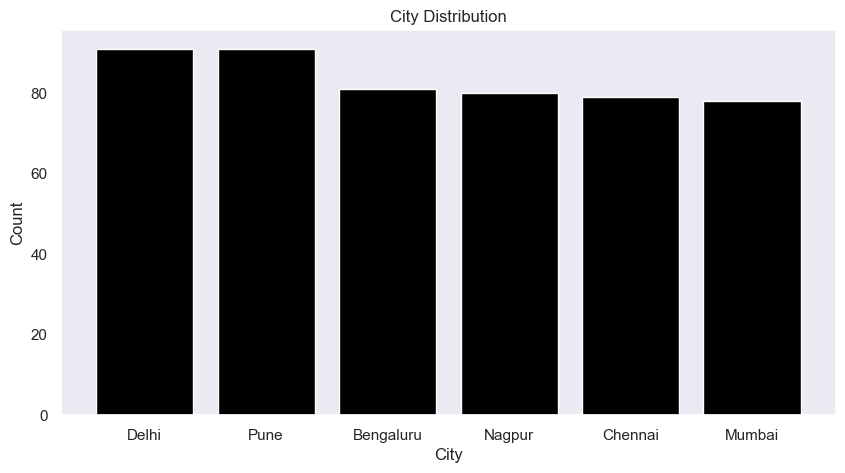

In [27]:
plt.figure(figsize=(10,5)) # Bar chart for City column
sns.set_theme(style="dark") 
plt.bar(df['City'].value_counts().index, df['City'].value_counts().values, color="black")
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

### This Visualization shows Delhi and Pune have the highest number of patients visiting the hospital.

In [28]:
df.head()

,Patient_ID,Name,Age,Gender,Blood_Type,Disease,Admission_Date,Discharge_Date,Days_Admitted,Doctor,Hospital_Department,Bill_Amount,Payment_Method,City,Follow_Up_Required
0,P1480,Patient_480,12.000000,Female,O+,Covid-19,2024-01-10,2024-01-11,1,Dr. Iyer,Neurology,36542.0,Cash,Delhi,Yes
1,P1449,Patient_449,54.000000,Male,B+,Covid-19,2024-03-18,2024-03-21,3,Dr. Mehta,Orthopedics,188356.0,Cash,Bengaluru,No
2,P1475,Patient_475,50.349174,Female,AB-,Cardiac Arrest,2024-07-13,2024-07-22,9,Dr. Sharma,General Medicine,267888.0,Insurance,Delhi,Yes
3,P1434,Patient_434,86.000000,Other,A+,Asthma,2024-10-26,2024-10-27,1,Dr. Khan,Neurology,232893.0,Insurance,Chennai,Yes
4,P1368,Patient_368,6.000000,Other,O-,Covid-19,2024-06-16,2024-06-13,6,Dr. Patel,General Medicine,42197.0,Cash,Chennai,No


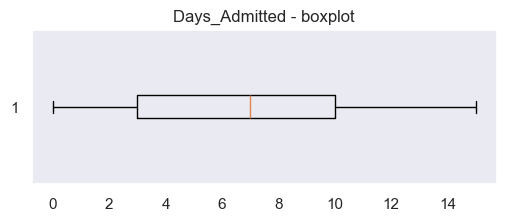

In [29]:
plt.figure(figsize=(6,2))
plt.boxplot(df['Days_Admitted'], vert=False)
plt.title('Days_Admitted - boxplot')
plt.show()

### Future Goals for the Hospital
Based on the data analysis, the hospital can focus on:
- Reducing follow-up needs by 10-15% through targeted preventive care programs for high-risk patients (e.g.Diabetes).
- Plan hospital resources better by guessing how long patients will stay, so the average stay time can go down from 6 days.
- Work with more insurance companies to help more patients and offer easy payment choices for those without insurance.
- Start health programs in specific cities where many patients come from to treat common local diseases and help people stay healthier.
